In [1]:
import numpy as np 
import pandas as pd

In [2]:
#Read the fisrt data set
churn1=pd.read_csv('TelcomCustomer-Churn_1.csv')
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
churn1=churn1.drop(columns='customerID')

In [4]:
#Read second Data set
churn2=pd.read_csv('TelcomCustomer-Churn_2.csv')
churn2

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
churn2.shape

(7043, 11)

# Joining Both Dataset & Data Cleaning

In [6]:
df=churn1.join(churn2)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.TotalCharges.isna().sum()

0

In [12]:
df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Data Visualisation
## Univariate Analysis
### Visualisation of Continious Variable 

In [14]:
import matplotlib.pyplot as plt
import seaborn  as  sns 
sns.set(color_codes=True)
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

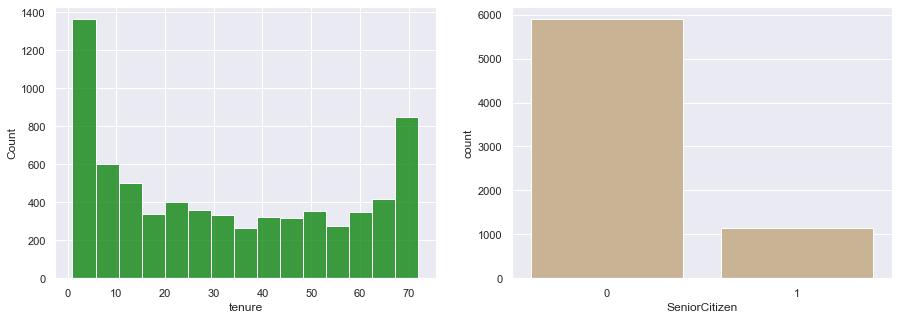

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['tenure'],color='Green');
plt.subplot(1,2,2)
sns.countplot(df['SeniorCitizen'],color='Tan');

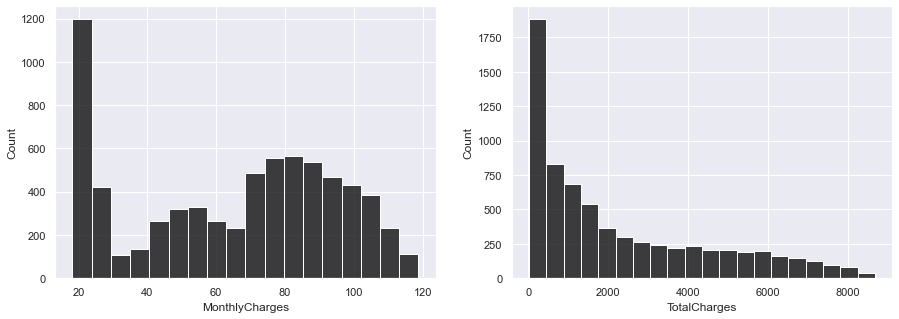

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['MonthlyCharges'],color='BLack')
plt.subplot(1,2,2)
sns.histplot(df['TotalCharges'],color='BLack', bins=20);

## Observation
1. SeniorCitizen are more likely less in the company.
2. The majority has low Monthly chaarges and Avg. is around 70-85.
3. Small percentage of customers having bill more than 4000.
4. Both Monthly and Total Charges distributon are right Skewed.

### Visualisation of Categorical Variable

<AxesSubplot:ylabel='Partner'>

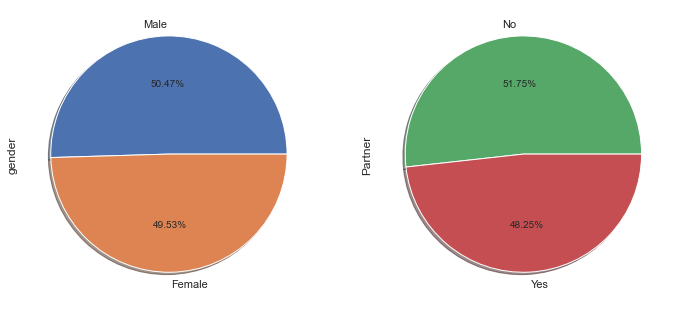

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
df['gender'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');
plt.subplot(1,3,2)
df['Partner'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',colors='green')

<AxesSubplot:ylabel='MultipleLines'>

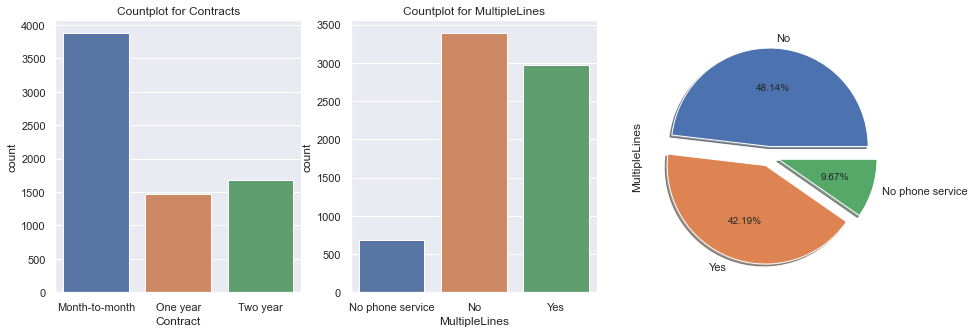

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Countplot for Contracts')
sns.countplot(df['Contract']);
plt.subplot(1,3,2)
plt.title('Countplot for MultipleLines')
sns.countplot(df['MultipleLines']);
plt.subplot(1,3,3)
df['MultipleLines'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1,0.1))

## Observation
1. Male Customers tends to be more than female 
2. Partner status is almost equal . Not impact much 
3. Month to month subscribers are highest But two year subscribers are more as compared with one year.
4. Multiple line ratio is almost equal .

### Variables related with Services 

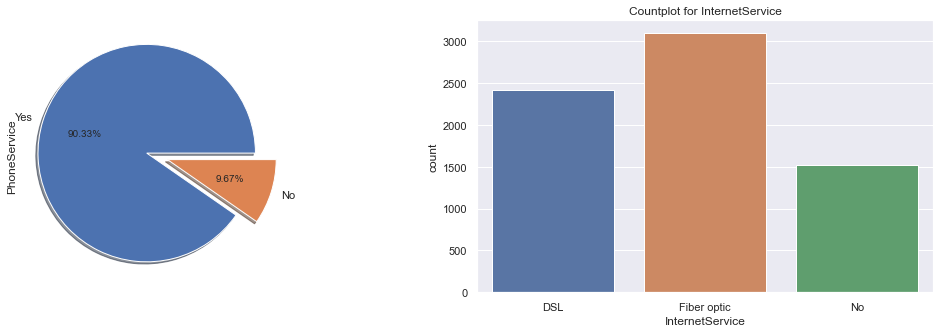

In [19]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['PhoneService'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1));
plt.subplot(1,2,2)
plt.title('Countplot for InternetService')
sns.countplot(df['InternetService']);
plt.show()

### Variables related with Securities

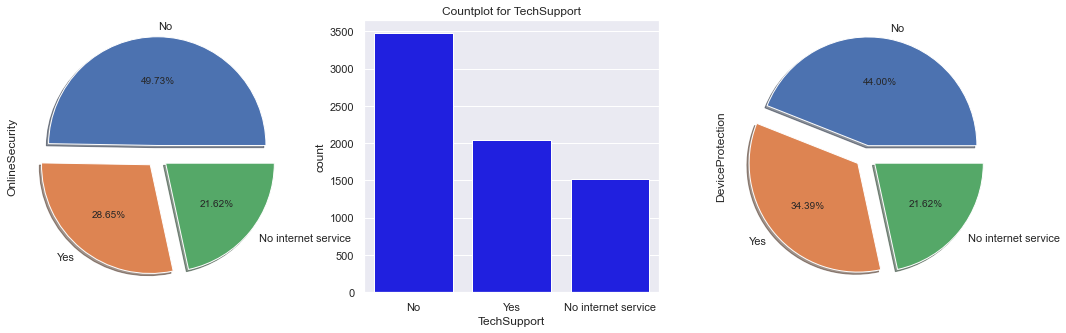

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
df['OnlineSecurity'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1,0.1));
plt.subplot(1,3,2)
plt.title('Countplot for TechSupport')
sns.countplot(df['TechSupport'],color='Blue');
plt.subplot(1,3,3)
df['DeviceProtection'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1,0.1));
plt.show()

### Variables related with Streaming

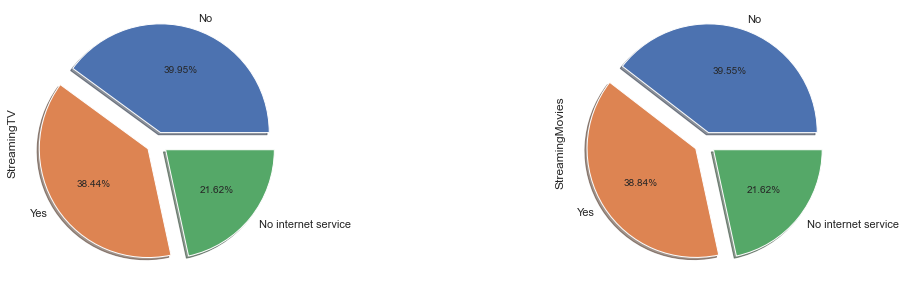

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['StreamingTV'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1,0.1));
plt.subplot(1,2,2)
df['StreamingMovies'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1,0.1));

### Variables related with Payments

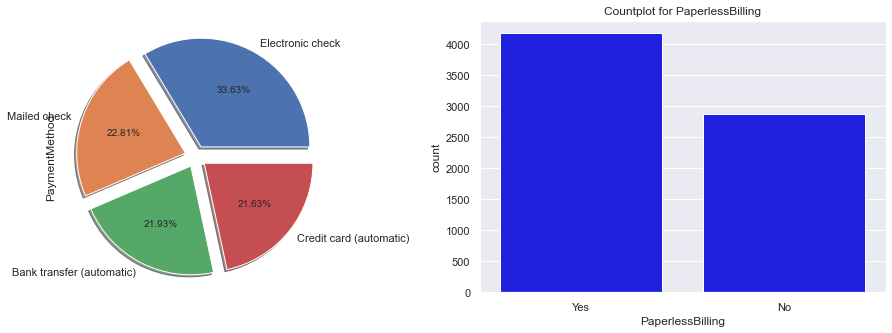

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
df['PaymentMethod'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',explode=(0.1,0.1,0.1,0.1));
plt.subplot(1,2,2)
plt.title('Countplot for PaperlessBilling')
sns.countplot(df['PaperlessBilling'],color='Blue');

## Observation

1. Customers are not Interested in terms of security as ratio of people are very less.  
2. Majority for streaming Tv and Movies are Equal as if company provide some offer than it can be increased more .
3. Customers are more interested in paperlessbilling. .

## Bivariate Analysis

### Plotting of Target Variable Vs Continious variable 

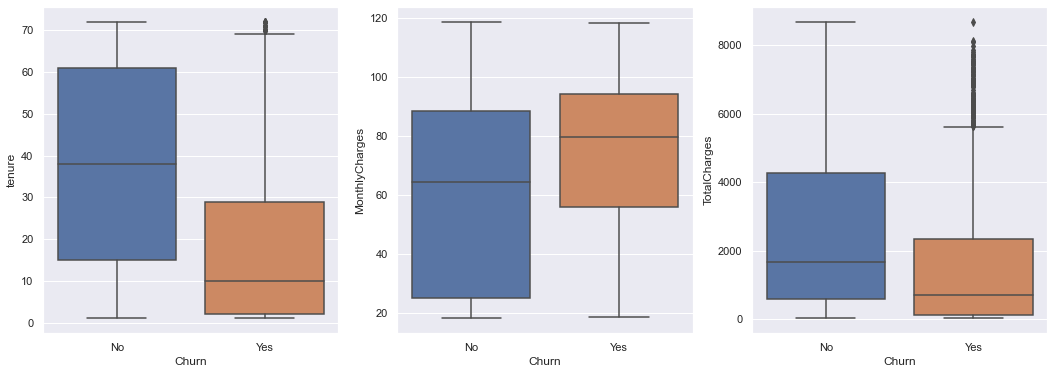

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(x='Churn',y='tenure', data=df );
plt.subplot(1,3,2)
sns.boxplot(x='Churn',y='MonthlyCharges', data=df )
plt.subplot(1,3,3)
sns.boxplot(x='Churn',y='TotalCharges', data=df );

###  Stripplot of Above Three variable

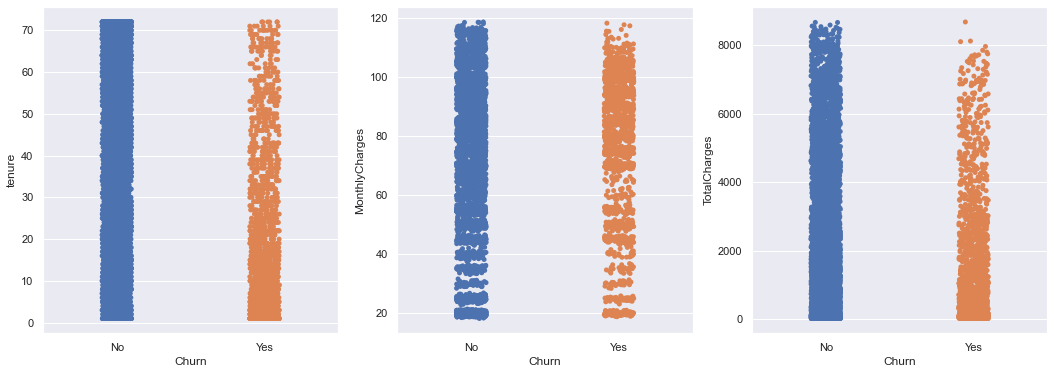

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.stripplot(x='Churn',y='tenure', data=df );
plt.subplot(1,3,2)
sns.stripplot(x='Churn',y='MonthlyCharges', data=df )
plt.subplot(1,3,3)
sns.stripplot(x='Churn',y='TotalCharges', data=df );

## Observation

####  Tenure
   1. The mean tenure of Churn Customers is almost 10.
   2. If some how it tends to continue till 15 than it may be the possibility of it will not Churn.
   
####  MonthlyCharges
   1. The mean of Churn and non- Churn are not same .
   2. Higher Avg. monthly charges tends to increase the probability of Churn Customers.
   
####  TotalCharges
   1. As we can see Avg. of total charges is very low so its means customers are not continuing till the full year and            lefting early.
   2. As outliers has made an impact on totalcharges.

####  Converting Class into Binary Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
col=['Churn']
le = LabelEncoder()
for i in col:
     df[i] = le.fit_transform(df[i])

## Target Variable Vs Categorical variable 
### Plotting Target variable Vs Variable related with Gender.

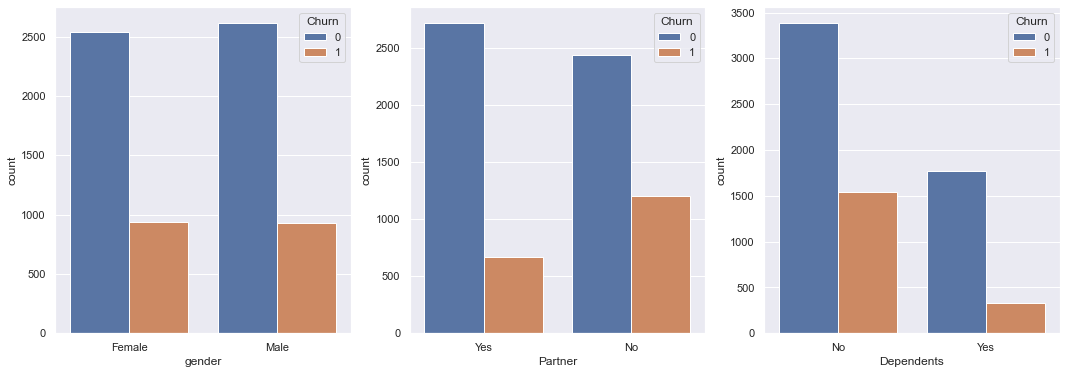

In [26]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='gender',hue='Churn' , data=df );
plt.subplot(1,3,2)
sns.countplot(x='Partner',hue='Churn' , data=df);
plt.subplot(1,3,3)
sns.countplot(x='Dependents',hue='Churn' , data=df);

### Plotting Target variable Vs Variable related with Services.

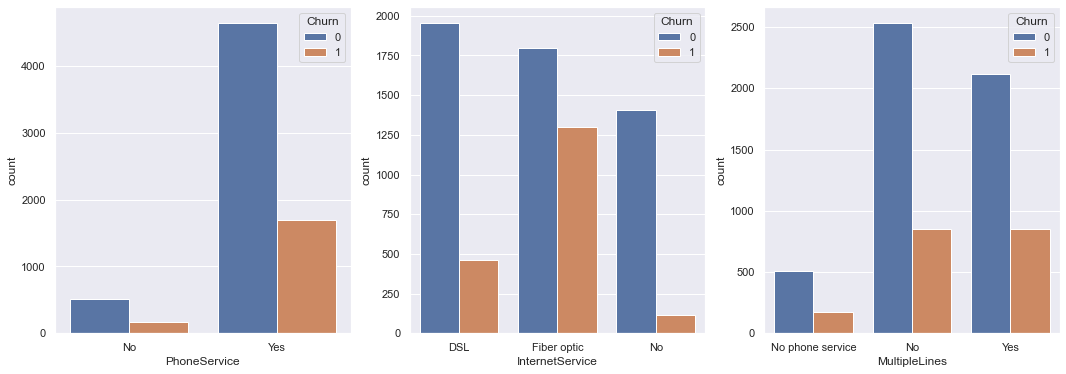

In [27]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='PhoneService',hue='Churn' , data=df );
plt.subplot(1,3,2)
sns.countplot(x='InternetService',hue='Churn' , data=df);
plt.subplot(1,3,3)
sns.countplot(x='MultipleLines',hue='Churn' , data=df);

### Plotting Target variable Vs Variable related with Security.

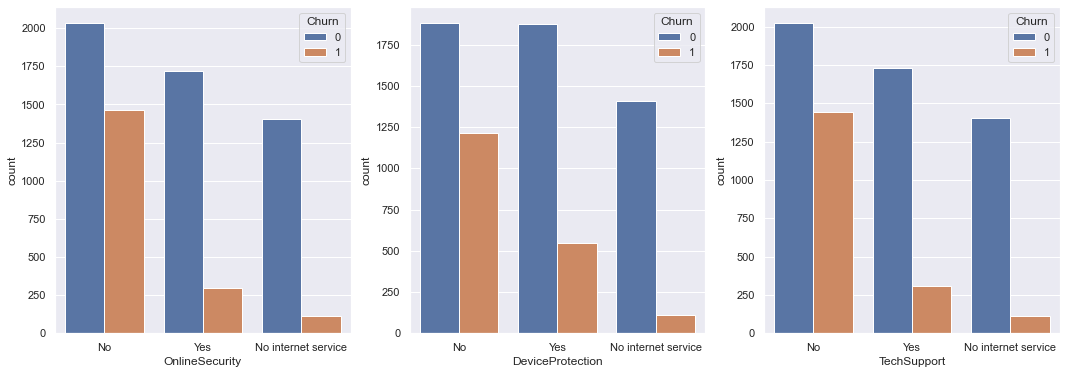

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='OnlineSecurity',hue='Churn' , data=df );
plt.subplot(1,3,2)
sns.countplot(x='DeviceProtection',hue='Churn' , data=df);
plt.subplot(1,3,3)
sns.countplot(x='TechSupport',hue='Churn' , data=df);

### Plotting Target variable Vs Variable related with Payments.

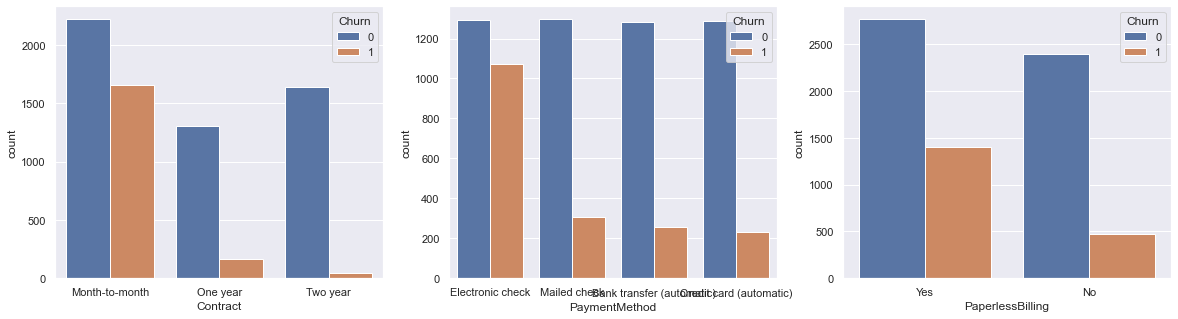

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='Contract',hue='Churn' , data=df );
plt.subplot(1,3,2)
sns.countplot(x='PaymentMethod',hue='Churn' , data=df);
plt.subplot(1,3,3)
sns.countplot(x='PaperlessBilling',hue='Churn' , data=df);

### Plotting Target variable Vs Variable related with Streaming.

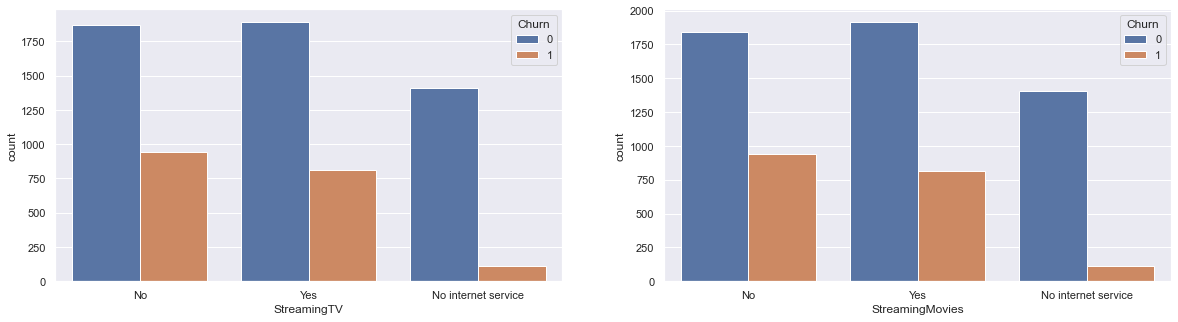

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='StreamingTV',hue='Churn' , data=df );
plt.subplot(1,2,2)
sns.countplot(x='StreamingMovies',hue='Churn' , data=df);

## Observation

####  Gender

   1. Ratio of Churn of male and Female is almost equal.
   2. The customers who do not have a partner are more likely to leave the company.
   3. The Customers not having dependents are more likely to leave the company.
   
####  Services
   
   1. The number of Customers with Phone Service leaving company more.
   2. Customer who opt Fibre opted service more likely to leave the company.
   3. Customer without multiple Lines service more likely to leave the company. 
   
####  Security

   1. Customers who Don't have the securities serives are tend to leave more .
   
####  Payments  
   1. Maximum number of people have opted for Monthly service and maximum customers who are leaving are the ones who have         taken Monthly service as long- lasting is not their.
   2. Customer who opt Electronic Checks service more likely to leave the company.
   3. Maximum number of people have opted for Paperless Billing and maximum customers who are leaving are the ones who have        taken paperless Billing.
   
####  Streaming
   1. customers who have not opted for TV streaming service are more likely to leave.
   2. The customers who have not opted for Streaming Movies service are more likely to leave.

## Multivariate Analysis

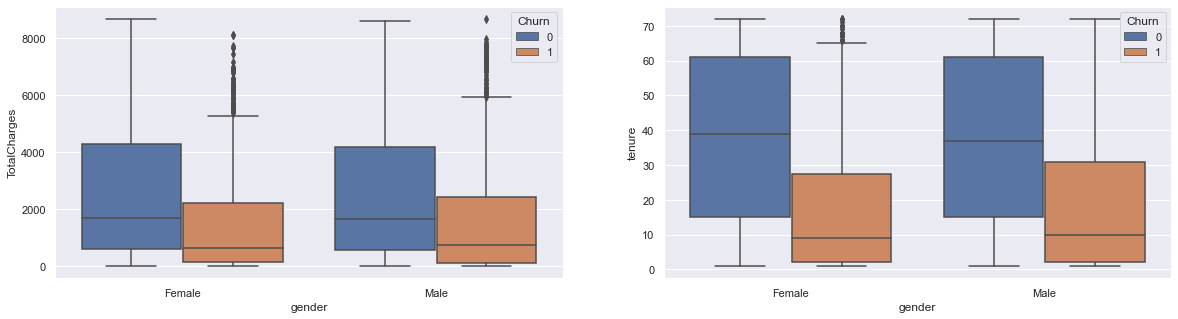

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='gender',y='TotalCharges',hue='Churn' , data=df );
plt.subplot(1,2,2)
sns.boxplot(x='gender',y='tenure',hue='Churn' , data=df );

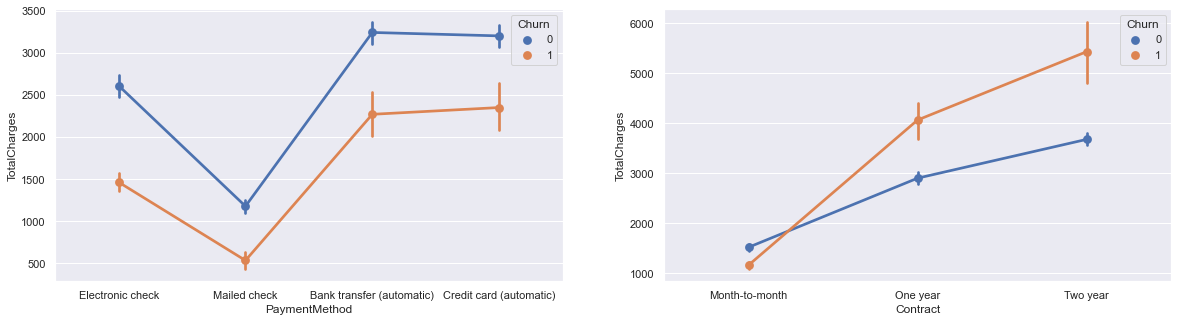

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.pointplot(x='PaymentMethod',y='TotalCharges',hue='Churn' , data=df );
plt.subplot(1,2,2)
sns.pointplot(x='Contract',y='TotalCharges',hue='Churn' , data=df );

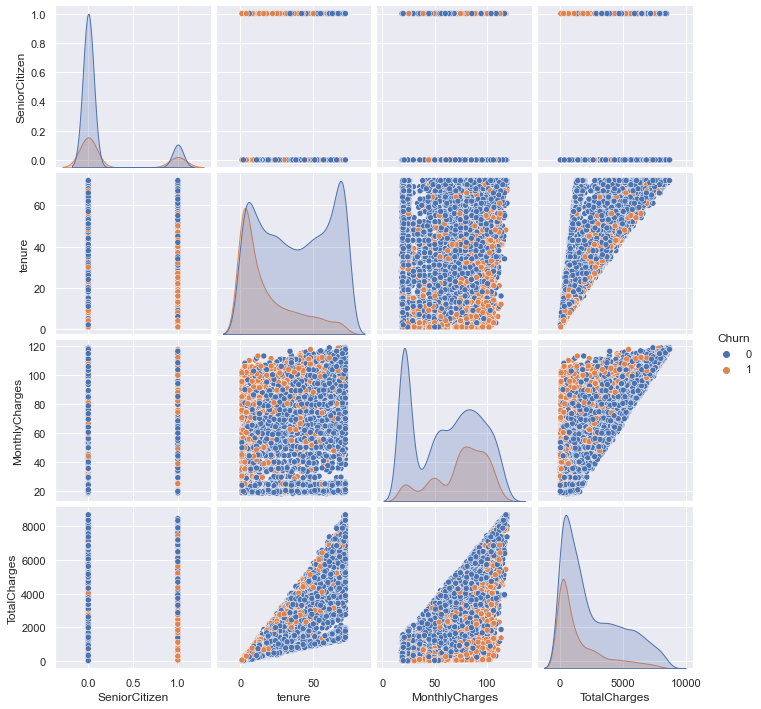

In [33]:
sns.pairplot(df,hue='Churn');

In [34]:
from sklearn.preprocessing import LabelEncoder
col=['gender','PhoneService','PaperlessBilling']
le = LabelEncoder()
for i in col:
     df[i] = le.fit_transform(df[i])

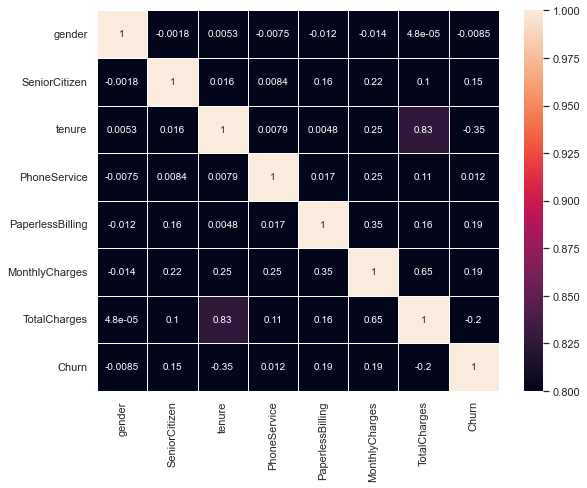

In [35]:
plt.figure(figsize=(9,7))
corr=df.corr()
sns.heatmap(corr,annot=True,vmin=0.8,linewidths=.5);

# As Tenure and Total cHarges are Highly Co-related.

## Target Imbalance

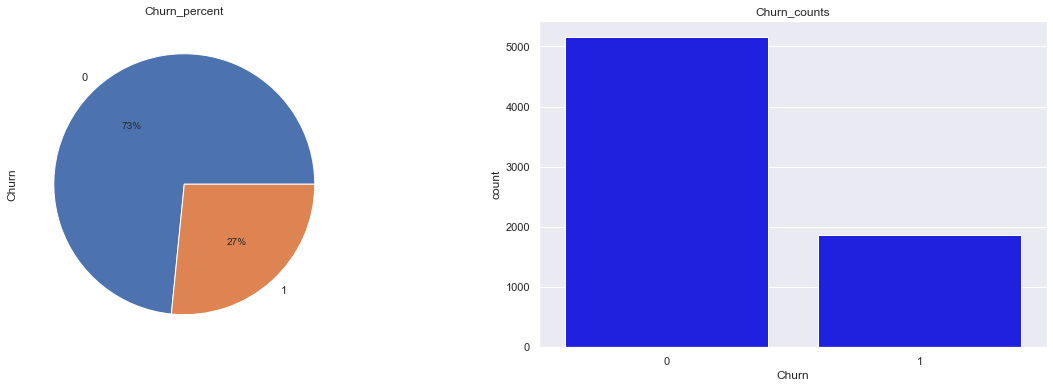

<Figure size 288x288 with 0 Axes>

In [36]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Churn_percent')
df['Churn'].value_counts().plot.pie(subplots=True,autopct='%.0f%%');

plt.subplot(1,2,2)
plt.title('Churn_counts')
sns.countplot(df['Churn'],color='Blue');plt.figure(figsize=(4,4));

plt.show();

####  Their is huge Target Imbalance.

## Data Pre-Processing

In [37]:
col=['tenure','MonthlyCharges', 'TotalCharges','SeniorCitizen']
for x in col:
    q25,q75=np.percentile(df[x],25),np.percentile(df[x],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[x for x in df[x] if x < lower or x > upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',x,len(Outliers)))
    print('\n')

 Total Number of outliers in tenure : 0


 Total Number of outliers in MonthlyCharges : 0


 Total Number of outliers in TotalCharges : 0


 Total Number of outliers in SeniorCitizen : 1142




In [38]:
from sklearn.preprocessing import LabelEncoder
col=['Churn','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport',
     'StreamingTV','StreamingMovies','Contract','PaymentMethod','OnlineBackup']
le = LabelEncoder()
for i in col:
     df[i] = le.fit_transform(df[i])  

##  Train and Split 

In [39]:
from scipy import stats
from sklearn.model_selection import train_test_split

In [40]:
y = df["Churn"]
x = df.drop(columns="Churn")

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)

 X_train dataset:  (4922, 19)
 y_train dataset:  (4922,)
 X_test dataset:  (2110, 19)
 y_test dataset:  (2110,)


# Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [43]:
Tree1=DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=1)
Tree1.fit(X_train,y_train);

In [44]:
y_pred1=Tree1.predict(X_test)
print('Accuracy of Training Data:',Tree1.score(X_train, y_train))
print('Accuracy of Testing Data',Tree1.score(X_test, y_test))

Accuracy of Training Data: 0.8029256399837464
Accuracy of Testing Data 0.7971563981042654


Text(0.5, 12.5, 'Predicted label\n')

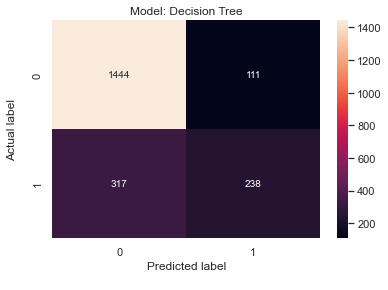

In [45]:
plt.title('Model: Decision Tree');
cm=sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [46]:
print("classification  Matrix:\n",classification_report(y_test,y_pred1))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1555
           1       0.68      0.43      0.53       555

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



### Infrences Of Decision Tree
 - Accuracy of  Model is 80%.
 - Model fails to classify around 317 cutsomers who left the company.
 - Customers who have not left the company. Model is able to predict 82% of those people and it performs brilliantly while predicting 93% correctly the people who have stayed with the company.
 - Customers who have left the company model is able to predict only the 68% of those people and out of only 43% able to identify correctly of those people who have actually left.

#  Bagging Classification 

In [47]:
from sklearn.ensemble import BaggingClassifier
Tree2=BaggingClassifier(n_estimators=20,max_features=10,random_state=1)
Tree2.fit(X_train,y_train)

BaggingClassifier(max_features=10, n_estimators=20, random_state=1)

In [48]:
y_pred2=Tree2.predict(X_test)
print('Accuracy of Training Data:',Tree2.score(X_train, y_train))
print('Accuracy of Training Data',Tree2.score(X_test, y_test))

Accuracy of Training Data: 0.9872003250711093
Accuracy of Training Data 0.7815165876777251


Text(0.5, 12.5, 'Predicted label\n')

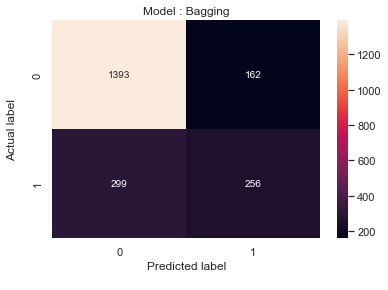

In [49]:
plt.title('Model : Bagging');
cm=sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [50]:
 print("classification  Matrix:\n",classification_report(y_test,y_pred2))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1555
           1       0.61      0.46      0.53       555

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



### Infrences Of Bagging Model
 - Accuracy of  Model is 78%.
 - Model fails to classify around 290 cutsomers who left the company.
 - Customers who have not left the company. Model is able to predict 82% of those people and it performs brilliantly while predicting 90% correctly the people who have stayed with the company.
 - Customers who have left the company model is able to predict only the 61% of those people and out of only 46% able to identify correctly of those people who have actually left.

##  Adaptive boosting Classification

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
Tree3=AdaBoostClassifier(n_estimators=30,random_state=1)
Tree3.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30, random_state=1)

In [53]:
y_pred3=Tree3.predict(X_test)
print('Accuracy of Training Data:',Tree3.score(X_train, y_train))
print('Accuracy of Training Data',Tree3.score(X_test, y_test))

Accuracy of Training Data: 0.8057700121901666
Accuracy of Training Data 0.7938388625592417


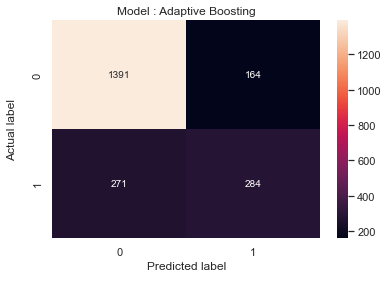

In [54]:
plt.title('Model : Adaptive Boosting');
cm=sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='g')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

In [55]:
print("classification  Matrix:\n",classification_report(y_test,y_pred3))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.51      0.57       555

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



### Infrences Of ADA boosting Model

- This model gives better accuracy as compared to the Bagging Classifier.
- Model is nearly 80% accurately predicting the Customer churn
- For the customers who have stayed with the company, the model is able to classify 84% correctly and the model could classify over 89% of customers who have stayed with the company.
- For the customers who have left the company, the model is able to classify only 63% customers correctly and the model could classify only 51% of the customers who left the company.
- The Accuracy of this is better than above two model.

## Gradient Boosting Classification

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

Tree4=GradientBoostingClassifier(n_estimators=30,learning_rate=0.3, random_state=1)
Tree4.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=30, random_state=1)

In [57]:
y_pred4=Tree4.predict(X_test)
print('Accuracy of Training Data:',Tree4.score(X_train, y_train))
print('Accuracy of Training Data',Tree4.score(X_test, y_test))

Accuracy of Training Data: 0.8331978870377895
Accuracy of Training Data 0.79478672985782


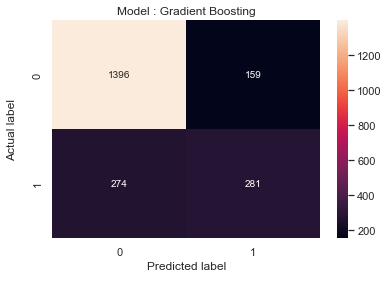

In [58]:
plt.title('Model : Gradient Boosting' );
cm=sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt='g')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

In [59]:
print("classification  Matrix:\n",classification_report(y_test,y_pred4))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.51      0.56       555

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



### Infrences Of Gradient boosting Model

- This model accuracy is almost equal compared to the ADA Classifier.
- Model is nearly 79% accurately predicting the Customer churn
- For the customers who have stayed with the company, the model is able to classify 84% correctly and the model could classify over 90% of customers who have stayed with the company.
- For the customers who have left the company, the model is able to classify only 64% customers correctly and the model could classify only 51% of the customers who left the company.
- The Accuracy of this is better than above three model.

### Random Forest Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier
Tree5=RandomForestClassifier(n_estimators=30, random_state=1)
Tree5.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=1)

In [61]:
y_pred5=Tree5.predict(X_test)
print('Accuracy of Training Data:',Tree5.score(X_train, y_train))
print('Accuracy of Training Data',Tree5.score(X_test, y_test))

Accuracy of Training Data: 0.9957334416903698
Accuracy of Training Data 0.7800947867298578


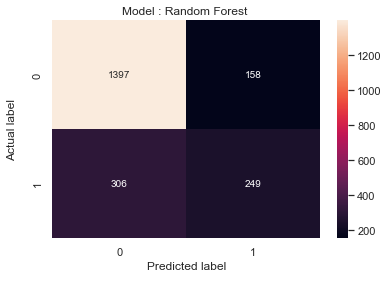

In [62]:
plt.title('Model : Random Forest ');
cm=sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True,fmt='g')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

In [63]:
print("classification  Matrix:\n",classification_report(y_test,y_pred5))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1555
           1       0.61      0.45      0.52       555

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



# Infrences Of Random forest Classification Model

- This model accuracy is almost equal compared to the Decision tree Classifier.
- Model is nearly 78% accurately predicting the Customer churn
- For the customers who have stayed with the company, the model is able to classify 82% correctly and the model could classify over 90% of customers who have stayed with the company.
- For the customers who have left the company, the model is able to classify only 61% customers correctly and the model could classify only 45% of the customers who left the company.

In [64]:
from sklearn.metrics import classification_report,recall_score,precision_score,accuracy_score,confusion_matrix

scores=pd.DataFrame({'Model':['Decision Tree','Bagging','Adaptive boosting','Gradient Boosting','Random Forest'],
                     'Accuracy':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)],
                     'recall':[recall_score(y_test,y_pred1),recall_score(y_test,y_pred2),recall_score(y_test,y_pred3),recall_score(y_test,y_pred4),recall_score(y_test,y_pred5)],
                     'Precision':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5)],
                     })

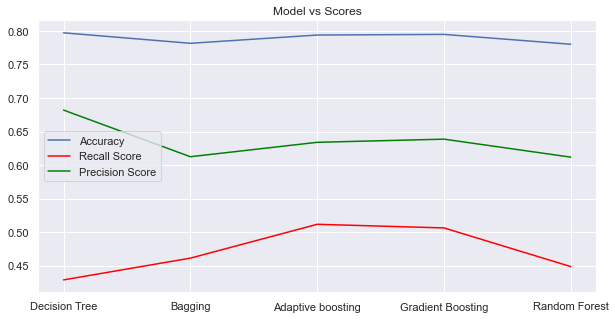

In [65]:
#Plotting for model vs Scores
plt.figure(figsize=(10,5))
plt.plot(scores['Model'],scores['Accuracy'],label = "Accuracy");
plt.plot(scores['Model'],scores['recall'],color='red',label = "Recall Score",);
plt.plot(scores['Model'],scores['Precision'],color='green',label = "Precision Score",);
plt.title('Model vs Scores');
plt.legend();

# Final Model Choice 

### - The Best Model for this is Adaptive Boosting as:-
- The Accuracy rate is Higher.
- The Recall score of model is high.
- We can select the Gradient Boosting as our mode as well because as accuracy of 79% is similar to ADA boosting but
  in ADA we are able to correctly classifying about 51% customers out of 63% as the Gradient boosting Predict 51% out of     64%. 
- The Margin is of very less but at Last we will go with ADA boosting.  

# Improvements and Suggestions

- The dataset should also have contained buying capacity in terms of salary, so that one could figure out the mindset of customer while he buys a plan and pays for his service.
- There should also be a provision to find if the customer and his family are using services from same company or not.if yes than we can avail some offers to them. If No we can offer them a family plan as of less value as compared to other company
- I strongly believe that the company should focus more on the fiber-optic provisions and online services like online streaming, etc.
- Majority of the customers prefer online billing and paperless approach, so it'd be more beneficial if the company could provide for some offers while transaction or cahback, it will certainly attract more customers and reduce churn.
- Since the customers chose monthly packs more. The company could provide for seasonal discounts for annual subscription.It will increase the long-lasting of customers and we have also seen if customer passes one year the probability of Churn Decreases.